# Sampling Distributions

In [80]:
import pandas as pd
attrition_pop = pd.read_feather('C:\\Users\\yazan\\Desktop\\Data_Analytics\\8-Sampling in Python\\Datasets\\attrition.feather')


# 1. Relative error of point estimates

<b>1.1 Calculating relative errors</b>

The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

In [81]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate teh mean employee attrition in the population sampel
mean_attrition_pop = attrition_pop['Attrition'].mean()

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(mean_attrition_pop-mean_attrition_srs50)/mean_attrition_pop

# Print rel_error_pct50
print(rel_error_pct50)

62.78481012658227


In [82]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition_pop - mean_attrition_srs100)/mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

6.962025316455695


As you increase the sample size, the sample mean generally gets closer to the population mean, and the relative error decreases.

# 2. Creating a sampling distribution

<b>2.1 Replicating samples</b>

When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many samples and calculate the sample mean (or another statistic) for each sample.

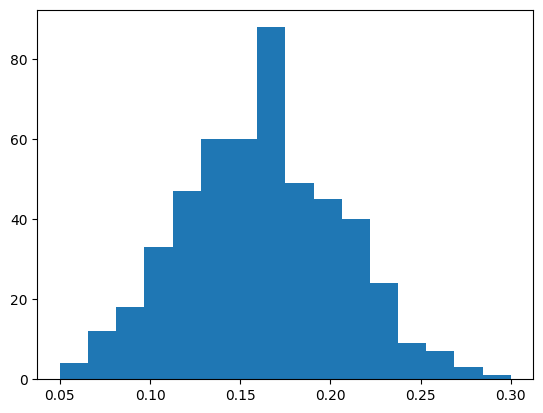

In [83]:
import matplotlib.pyplot as plt
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)

# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16)
plt.show()

By generating the sample statistic many times with different samples, you can quantify the amount of variation in those statistics.

<b>2.2 Replication parameters</b>

There are two parameters that effect the range sample distribution range: the size of each simple random sample, and the number of replicates. It's important to understand how each of these parameters affects the result. Use the parameter sliders to explore different values and note their effect on the histogram.


<b>Question</b>

Which statement about the effect of each parameter on the distribution of sample means is true?

Possible Answers:

- As the sample size increases, the range of calculated sample means tends to increase.

- As the number of replicates increases, the range of calculated sample means tends to increase.

- As the sample size increases, the range of calculated sample means tends to decrease.  (True)

- As the number of replicates increases, the range of calculated sample means tends to decrease.

As sample size increases, on average each sample mean has a lower relative error compared to the population mean, thus reducing the range of the distribution.

# 3. Approximate sampling distributions

<b>3.1 Exact sampling distribution</b>

To quantify how the point estimate (sample statistic) you are interested in varies, you need to know all the possible values it can take and how often. That is, you need to know its distribution.

The distribution of a sample statistic is called the sampling distribution. When we can calculate this exactly, rather than using an approximation, it is known as the exact sampling distribution.

Let's take a look at the sampling distribution of dice rolls. This time, we'll look at five eight-sided dice. (These have the numbers one to eight.)

The expand_grid() function is also available, which expects a dictionary of key-value pairs as its argument. The definition of the expand_grid() function is provided in the pandas documentation(https://pandas.pydata.org/pandas-docs/version/0.17.1/cookbook.html#sql).

```python:
 def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())
```

In [84]:
'''
Expand a grid representing 5 8-sided dice. That is, create a DataFrame with five columns from a dictionary, 
named die1 to die5. The rows should contain all possibilities for throwing five dice, each numbered 1 to 8.'''

import pandas as pd
import itertools
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

# Expand a grid representing 5 8-sided dice
dice = expand_grid(

    {'die1':[1, 2, 3, 4, 5, 6, 7, 8],
     'die2':[1, 2, 3, 4, 5, 6, 7, 8],
     'die3':[1, 2, 3, 4, 5, 6, 7, 8],
     'die4':[1, 2, 3, 4, 5, 6, 7, 8],
     'die5':[1, 2, 3, 4, 5, 6, 7, 8],
    }
)

# Print the result
print(dice)

       die1  die2  die3  die4  die5
0         1     1     1     1     1
1         1     1     1     1     2
2         1     1     1     1     3
3         1     1     1     1     4
4         1     1     1     1     5
...     ...   ...   ...   ...   ...
32763     8     8     8     8     4
32764     8     8     8     8     5
32765     8     8     8     8     6
32766     8     8     8     8     7
32767     8     8     8     8     8

[32768 rows x 5 columns]


In [85]:
'''Add a column, mean_roll, to dice, that contains the mean of the five rolls as a categorical.'''

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
                                  
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Print result
print(dice)

       die1  die2  die3  die4  die5 mean_roll
0         1     1     1     1     1       1.0
1         1     1     1     1     2       1.2
2         1     1     1     1     3       1.4
3         1     1     1     1     4       1.6
4         1     1     1     1     5       1.8
...     ...   ...   ...   ...   ...       ...
32763     8     8     8     8     4       7.2
32764     8     8     8     8     5       7.4
32765     8     8     8     8     6       7.6
32766     8     8     8     8     7       7.8
32767     8     8     8     8     8       8.0

[32768 rows x 6 columns]


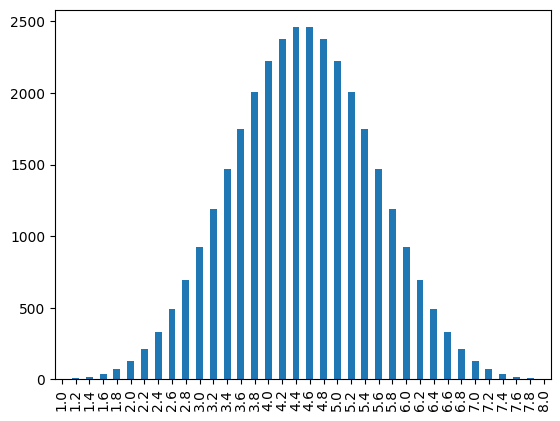

In [86]:
'''
Create a bar plot of the mean_roll categorical column, so it displays the count of each mean_roll 
in increasing order from 1.0 to 8.0.'''

import matplotlib.pyplot as plt
# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')
plt.show()

The exact sampling distribution shows all possible variations of the point estimate that you are interested in.

<b>3.2 Generating an approximate sampling distribution</b>

Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is 8**5, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

In [87]:
'''
- Sample one to eight, five times, with replacement. Assign to five_rolls.
- Calculate the mean of five_rolls.'''

import numpy as np
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1, 9)), size=5, replace=True)

# Print the mean of five_rolls
print(np.mean(five_rolls))

3.6


In [88]:
'''Replicate the sampling code 1000 times, assigning each result to the list sample_means_1000.'''
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )
    
# Print the first 10 entries of the result
print(sample_means_1000[0:10])

[6.0, 5.2, 4.0, 4.6, 3.8, 4.2, 3.4, 5.4, 6.4, 5.8]


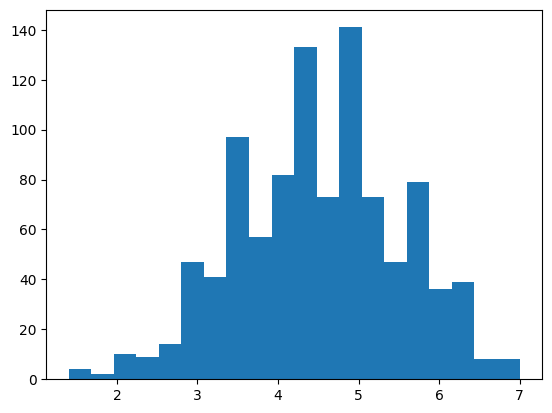

In [89]:
'''Plot sample_means_1000 as a histogram with 20 bins.'''
# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins=20)
plt.show()

Once your dataset gets sufficiently big, exact sampling distributions cannot be calculated, so an approximate sampling distribution must be used. Notice that the histogram is close to but not exactly the same as the shape of the bar graph from the previous exercise.

<b>3.3 Exact vs. approximate</b>

You've seen two types of sampling distribution now (exact and approximate). It's really important to understand when each should be computed.

Should we always be able to compute the exact sampling distribution directly?

- No, the exact sampling distribution is always unknown even for calculating the sample mean of a small number of die tosses like 2 or 3.

- Yes, the population will always be known ahead of time, so one extra calculation is no problem.

- Yes, the exact sampling distribution can be generated using a for loop, so it should be possible in all circumstances.

- No, the computational time and resources needed to look at the population of values could be too much for our problem.(True)


The exact sampling distribution can only be calculated if you know what the population is and if the problems are small and simple enough to compute. Otherwise, the approximate sampling distribution must be used.

# 4. Standard errors and the Central Limit Theorem

<b>4.1 Population & sampling distribution means</b>

One of the useful features of sampling distributions is that you can quantify them. Specifically, you can calculate summary statistics on them. Here, you'll look at the relationship between the mean of the sampling distribution and the population parameter's mean.

Three sampling distributions are provided. For each, the employee attrition dataset was sampled using simple random sampling, then the mean attrition was calculated. This was done 1000 times to get a sampling distribution of mean attritions. One sampling distribution used a sample size of 5 for each replicate, one used 50, and one used 500.

In [90]:
sampling_distribution_5 = []
sampling_distribution_50 = []
sampling_distribution_500 = []

for i in range(1000):
    sampling_distribution_5.append(attrition_pop.sample(n=5)['Attrition'].mean())
    sampling_distribution_50.append(attrition_pop.sample(n=50)['Attrition'].mean())
    sampling_distribution_500.append(attrition_pop.sample(n=500)['Attrition'].mean())

# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)

# Print the results
print('The mean of Attrition in the population sample is: ', attrition_pop['Attrition'].mean())
print('\n')
print('The mean of sample means in a sample size of 5: ', mean_of_means_5)
print('The mean of sample means in a sample size of 50: ',mean_of_means_50)
print('The mean of sample means in a sample size of 500: ',mean_of_means_500)

The mean of Attrition in the population sample is:  0.16122448979591836


The mean of sample means in a sample size of 5:  0.15480000000000002
The mean of sample means in a sample size of 50:  0.16202
The mean of sample means in a sample size of 500:  0.16111199999999998


<b>Question</b>

How does sample size affect the mean of the sample means?

Possible Answers:

- As the sample size increases, the mean of the sampling distribution decreases until it reaches the population mean.

- As the sample size increases, the mean of the sampling distribution increases until it reaches the population mean.

- Regardless of sample size, the mean of the sampling distribution is a close approximation to the population mean.

- Regardless of sample size, the mean of the sampling distribution is biased and cannot approximate the population mean. (True)

Even for small sample sizes, the mean of the sampling distribution is a good approximation of the population mean.

<b>4.2 Population & sampling distribution variation</b>

You just calculated the mean of the sampling distribution and saw how it is an estimate of the corresponding population parameter. Similarly, as a result of the central limit theorem, the standard deviation of the sampling distribution has an interesting relationship with the population parameter's standard deviation and the sample size.

In [93]:
# Calculate the std. dev. of the mean attritions for each sampling distribution
pop_std = attrition_pop['Attrition'].std(ddof=0)
sd_of_means_5 = np.std(sampling_distribution_5, ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50, ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500, ddof=1)

# Print the results
print('The population standard deviation: ', pop_std)
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)

Summary = pd.DataFrame(
    {'Sample_Size': [5, 50, 500],
     'std sample mean': [sd_of_means_5, sd_of_means_50, sd_of_means_500],
     'Calculation': [f'{pop_std}''/sqrt(5)', f'{pop_std}''/sqrt(50)', f'{pop_std}''/sqrt(500)'],
     'result':[f'{attrition_pop["Attrition"].std(ddof=0)/np.sqrt(5)}', f'{attrition_pop["Attrition"].std(ddof=0)/np.sqrt(50)}', 
                    f'{attrition_pop["Attrition"].std(ddof=0)/np.sqrt(500)}']
    
    }
)

print(Summary)

The population standard deviation:  0.367737887204955
0.15793005382732542
0.04987591810891512
0.01365246665792837
   Sample_Size  std sample mean                  Calculation  \
0            5         0.157930    0.367737887204955/sqrt(5)   
1           50         0.049876   0.367737887204955/sqrt(50)   
2          500         0.013652  0.367737887204955/sqrt(500)   

                 result  
0    0.1644573827384859  
1   0.05200599074836748  
2  0.016445738273848588  


<b>Question</b>

How are the standard deviations of the sampling distributions related to the population standard deviation and the sample size?

Possible Answers

- The standard deviation of the sampling distribution is approximately equal to the population standard deviation, regardless of sample size.

- The standard deviation of the sampling distribution is approximately equal to the population standard deviation multiplied by the sample size.

- The standard deviation of the sampling distribution is approximately equal to the population standard deviation multiplied by the square root of the sample size.

- The standard deviation of the sampling distribution is approximately equal to the population standard deviation divided by the sample size.

- The standard deviation of the sampling distribution is approximately equal to the population standard deviation divided by the square root of the sample size.   (True)


The amount of variation in the sampling distribution is related to the amount of variation in the population and the sample size. This is another consequence of the Central Limit Theorem.